In [46]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from datetime import datetime
import datetime

import ipywidgets

%matplotlib widget
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model

<h1>Natural Disasters</h1>

In [47]:
ecodamage= pd.read_csv("../Data/natural-disasters.csv", delimiter=";", decimal=',')

ecodamage = ecodamage[['Country name','Year','Total economic damages from disasters','Number of total people affected by disasters']]
ecodamage = ecodamage.rename(columns={'Country name': 'Country', 'Total economic damages from disasters': 'Damage','Number of total people affected by disasters': 'Affected People'})
ecodamage['Year'] = ecodamage['Year'].astype(int)

ecodamage = ecodamage.loc[ecodamage['Year'] >=1997]
ecodamage = ecodamage.loc[ecodamage['Year'] <2022]

ecodamage_world = ecodamage.loc[ecodamage['Country'] == 'World']
ecodamage_china = ecodamage.loc[ecodamage['Country'] == 'China']
ecodamage_world = ecodamage_world[['Year','Damage','Affected People']]
ecodamage_china = ecodamage_china[['Year','Damage','Affected People']]
ecodamage_china = ecodamage_china.rename(columns={ 'Damage': 'Damage (CN)','Affected People': 'Affected People (CN)'})


ecodamage_world = ecodamage_world.set_index('Year')
ecodamage_china = ecodamage_china.set_index('Year')

ecodamage_world.tail(20)

,Damage,Affected People
Year,,
2002,5.161715e+10,657447243.0
2003,6.983575e+10,254954552.0
2004,1.363780e+11,161718760.0
2005,2.152050e+11,160310808.0
2006,3.310495e+10,125947569.0
2007,7.439400e+10,212359944.0
2008,1.908710e+11,221418683.0
2009,4.677639e+10,200797373.0
2010,1.321940e+11,266543904.0


In [48]:
energy_df = pd.read_csv("../Data/EnergyIndex.csv")

#energy_df =  energy_df.set_index('DATE')
energy_df.index = pd.to_datetime(energy_df['DATE'],format='%Y/%m/%d')
energy_df = energy_df.loc['1997-10-01':'2022-09-01']
energy_df['Year'] = pd.to_datetime(energy_df["DATE"]).dt.strftime('%Y')
energy_df = energy_df.groupby('Year').median()
energy_df.index = energy_df.index.astype(int)

energy_df

,Price
Year,
1997,51.295632
1998,37.278648
1999,45.040303
2000,73.918630
2001,68.259593
2002,63.583377
2003,76.072185
2004,98.611335
2005,134.183777


In [49]:
df =  pd.concat([energy_df,ecodamage_world,ecodamage_china], axis=1)
#df = df.rename(columns={'Price': 'EnergyPrice', 'PNGASEUUSDM': 'GasPrice'})
df


,Price,Damage,Affected People,Damage (CN),Affected People (CN)
Year,,,,,
1997,51.295632,4.025845e+10,68412955.0,6.402400e+09,15841183.0
1998,37.278648,8.642609e+10,342839928.0,3.328182e+10,254900724.0
1999,45.040303,1.122490e+11,284175229.0,1.012810e+10,131415462.0
2000,73.918630,4.657644e+10,169953905.0,1.491185e+09,25401373.0
2001,68.259593,2.707444e+10,109230632.0,4.449000e+09,40370434.0
2002,63.583377,5.161715e+10,657447243.0,6.156800e+09,285288179.0
2003,76.072185,6.983575e+10,254954552.0,1.636851e+10,219552435.0
2004,98.611335,1.363780e+11,161718760.0,4.327480e+09,52949587.0
2005,134.183777,2.152050e+11,160310808.0,1.182278e+10,83943106.0


In [50]:
cols = ['Price', 'Damage','Affected People', 'Damage (CN)','Affected People (CN)']

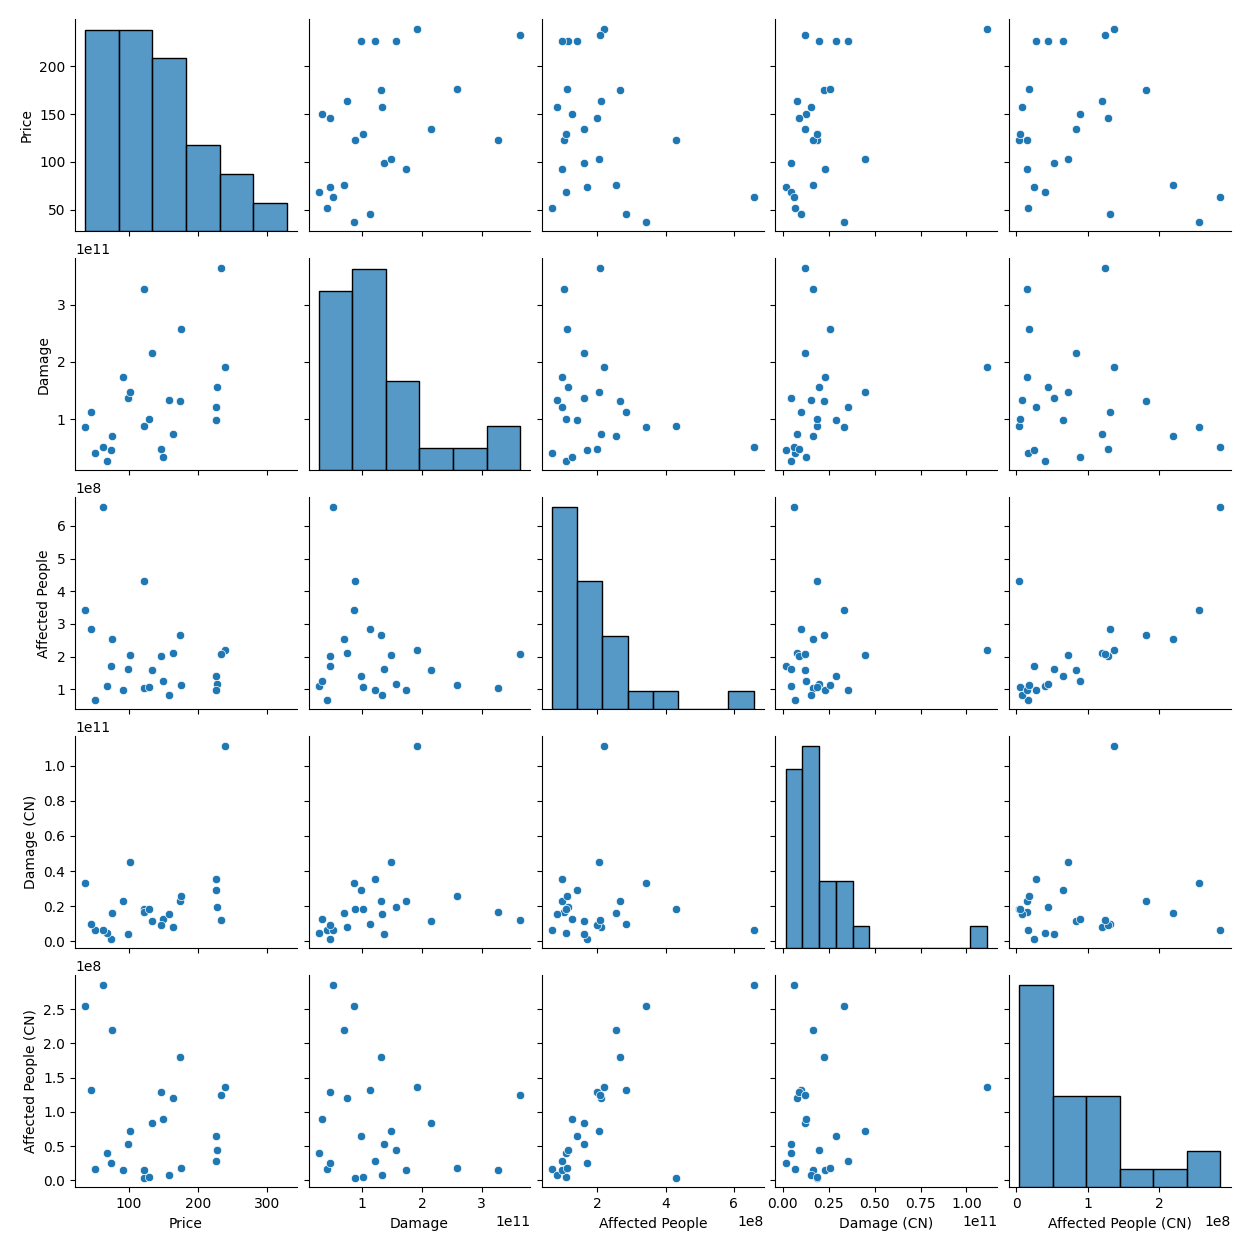

In [51]:
sns.pairplot(df[cols])

Correlation gives insights about the reliability of the change for the impacted node. A small correlation means lower reliability. 

In [52]:
df.corr()

,Price,Damage,Affected People,Damage (CN),Affected People (CN)
Price,1.000000,0.445302,-0.292860,0.437139,-0.198839
Damage,0.445302,1.000000,-0.213659,0.235362,-0.176730
Affected People,-0.292860,-0.213659,1.000000,-0.005501,0.714684
Damage (CN),0.437139,0.235362,-0.005501,1.000000,0.104424
Affected People (CN),-0.198839,-0.176730,0.714684,0.104424,1.000000


In [53]:
regr = linear_model.LinearRegression()
regr.fit(df[['GasPrice']], df['EnergyPrice'])
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


KeyError: "None of [Index(['GasPrice'], dtype='object')] are in the [columns]"

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(df[['OilPrice']], df['EnergyPrice'])
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 12.388565726320735
Coefficients: 
 [2.11557591]


In [ ]:
predictions = regr.predict(df["GasPrice"].to_numpy())

plt.plot(df['Date'], predictions, label="Regression")
plt.plot(df["Date"], df["GasPrice"], label = "Historical Price Data")
plt.ylabel("Aluminium Price")
plt.xlabel("Time")
plt.legend(loc="upper left")

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(df[['OilPrice', 'GasPrice']], df['EnergyPrice'])
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 13.481722433394651
Coefficients: 
 [1.71864581 2.90536057]
